# 1. Introduction
In this notebook, I will try to build multiple classification models for the MNIST dataset, and compare those model to find the best model. With the best model, try to achieve as high accuracy as possible!


今回は、MNIST データに対して３つの分類アルゴリズムでアプローチを試みます。それぞれの結果を比較し最も優れたスコアを出したモデルに対してファインチューニングを行い、高い正確性へ到達することが目標です。


Import the necesarry library.

In [27]:
# To save the trained model
import joblib
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# 2. Get the Data

Download the MNIST Data set from fetch_openml library. MNIST is a dataset that consist of 70,000 grayscale handwritten digit images ranging from 0 to 9. Each images is a 28x28 pixel grid, where each pixel have a value between 0 to 255, representing the intensity of the pixel.

fetch_openmlライブラリからMNISTデータセットをダウンロードします。MNISTは、0から9までの手書きの数字のグレースケール画像70,000枚で構成されるデータセットです。各画像は28x28ピクセルのグリッドで、各ピクセルには0から255までの値があり、ピクセルの明るさを表しています。

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
X.shape

(70000, 784)

In [5]:
X[0].shape

(784,)

In [6]:
y.shape

(70000,)

In [7]:
y[0]

'5'

In [40]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

# 3. Explore the Data

In [8]:
print(np.isnan(X).any())

False


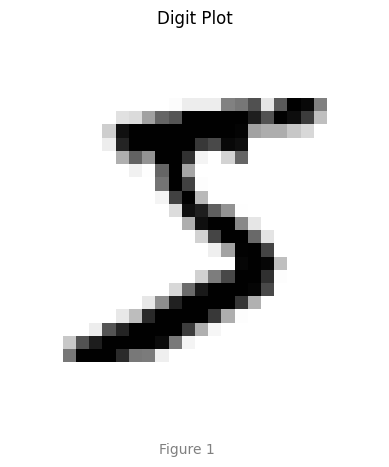

In [9]:
# Creat a function that generate a each digit.
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.title("Digit Plot")
plt.text(0.5, 0.001, 'Figure 1', ha='center', fontsize=10, color="gray", transform=plt.gcf().transFigure)
plt.show()

In [4]:
# Split the data into the train and test data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Let's see how the handwritten digit data looks like with first 100 data.



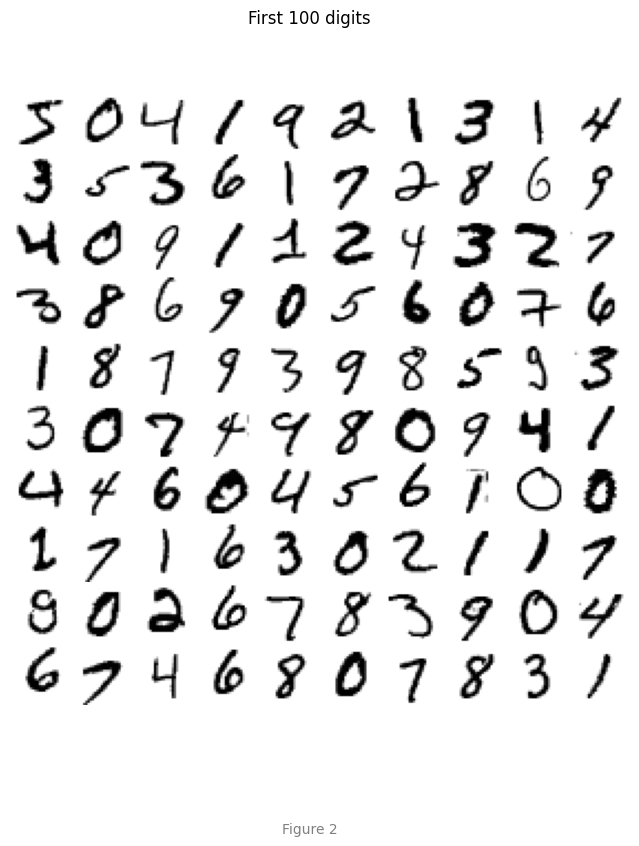

In [11]:
plt.figure(figsize=(8, 8))
plt.suptitle("First 100 digits")
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)


plt.subplots_adjust(wspace=0, hspace=0)
plt.text(0.5, -0.05, 'Figure 2', ha='center', fontsize=10, color="gray", transform=plt.gcf().transFigure)
plt.show()

See the distribution of each target number. If there are significant difference of distributino among the traget number, it could bias the model's training process.

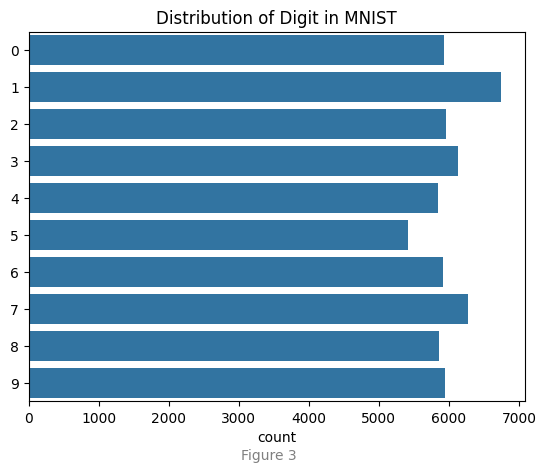

In [12]:
sns.countplot(sorted(y_train))
plt.title("Distribution of Digit in MNIST")
plt.text(0.5, -0.01, 'Figure 3', fontsize=10, ha='center', color="gray", transform=plt.gcf().transFigure)
plt.show()

It appears that there is no significant difference in the number of instance for each digit.

In [13]:
X_train.shape

(60000, 784)

In [14]:
X_train.min()

0

# 4. Prepare the Data

## 4.1 Normalization
For better training, the training data should be normalized to a range 0 to 1. To keep the original dataset intact, I'll create a copy of the data and work on it.

In [15]:
X_train_original = X_train.copy()
X_test_original = X_test.copy()

X_train = X_train / 255.0
X_test = X_test / 255.0

# 5. Train the Models

I am planning to build three model for this task:
1. Logistic Regressin
2. KNeighbors Classifiers
3. Convolutional Neural Networks

## 5.1 Logistic Regression

### Cross-Validation

In [16]:
log_reg = LogisticRegression(random_state=42)
cross_val_score(log_reg, X_train, y_train, cv=3, scoring="accuracy")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.9164 , 0.91755, 0.92045])

The accuracy scores appears to not be so good that I plan to mesure confusion matrix to evaluate the model, as it could be much better way for evaluation. To measure the confusion matrix, I need to fully train the model and then make prediction using cross_val_predict() to keep the test set untouched for now.(I want to use the test set at the very end of this project)

### Train The Model

In [17]:
log_reg.fit(X_train, y_train)
# Save the trained model
joblib.dump(log_reg, 'logistic_regression_model.pkl')
# Make prediction
y_train_predict = cross_val_predict(log_reg, X_train, y_train, cv=3)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### Confusion Matrix

In [18]:
cm = confusion_matrix(y_train, y_train_predict)

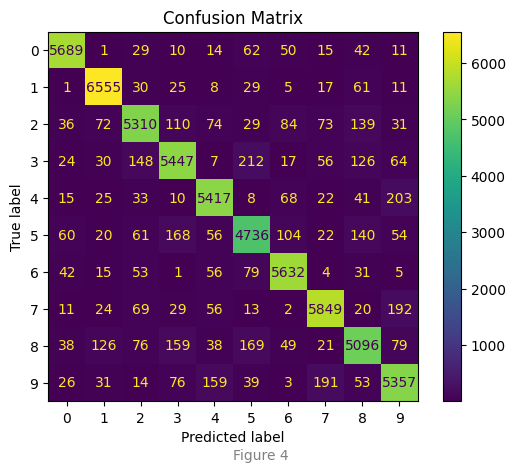

In [19]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict)
plt.title("Confusion Matrix")
plt.text(0.5, -0.01, 'Figure 4', fontsize=10, ha='center', color="gray", transform=plt.gcf().transFigure)
plt.show()

Upon inspecting the confusion matrix, I noticed that the cell on the diagonal for 5(row 5, column 5) appears slightly darker than the other cells. This could indicate one of two possibilities.

1. The model made more errors when classifying digit 5.
2. There are fewer instances of digit 5 in the dataset compared to other digits, causing the cell to appear more pronounced.

Having said that, I can observe from figure 3 above the number of instances for digit 5 is relatively fewer compared to ohter digits.This suggest that the option 2 is likely the case.

To better interpret the model's performance, it would be benefitial to normalize the confuison matrix by dividing by the total number of images in the corresponding true class. By normalizing, I can better understand the model's performance as a proportion of correctly predicted instances for each class.

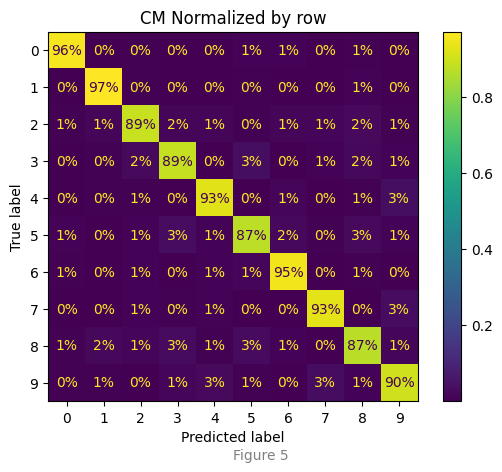

In [20]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict, normalize='true', values_format=".0%")
plt.title("CM Normalized by row")
plt.text(0.5, -0.01, 'Figure 5', fontsize=10, ha='center', color="gray", transform=plt.gcf().transFigure)
plt.show()

I found that the performance is generally consistent across most classes. However, the model appears to struggle with digits 5 and 8, performing slightly poorer on these compared to other digits. This suggests that the model may have difficulty distinguishing these particular digits, potentially due to their more complex or similar shapes.

To further highlight the misclassifications and better understand where the model is making errors, I plan to apply zero-weighting to the correct predictions. This will emphasize the errors, making it easier to analyze where the model fails and providing a more detailed view of the areas that need improvement.

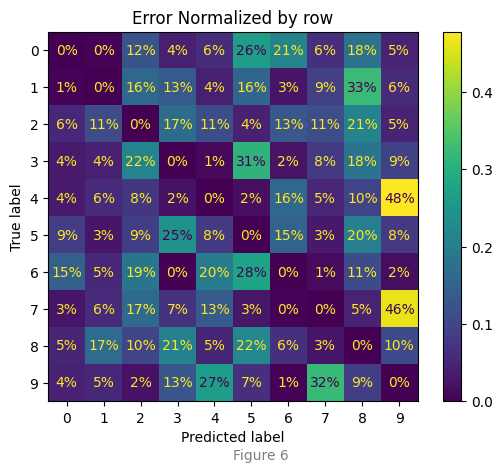

In [21]:
sample_weight = (y_train != y_train_predict)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict,
                                        sample_weight=sample_weight,
                                        normalize='true',
                                        values_format=".0%")
plt.title("Error Normalized by row")
plt.text(0.5, -0.01, 'Figure 6', fontsize=10, ha='center', color="gray", transform=plt.gcf().transFigure)
plt.show()

The cells in row4 and column9 and row7 and column9 is much brighter than other cells. This indicates that 48% of error the model made on the image of 4 were misclassification as 9.

### Precision and Recall

In [22]:
precision_score(y_train, y_train_predict, average="macro")

0.917100138916056

In [23]:
recall_score(y_train, y_train_predict, average="macro")

0.9170043326309646

In [24]:
f1_score(y_train, y_train_predict, average="macro")

0.9170040477124916

In [25]:
log_reg_report = classification_report(y_train, y_train_predict, output_dict=True)

log_reg_report_df = pd.DataFrame(log_reg_report).transpose()

In [26]:
log_reg_report_df

,precision,recall,f1-score,support
0,0.957422,0.960493,0.958955,5923.000000
1,0.950138,0.972263,0.961073,6742.000000
2,0.911901,0.891239,0.901451,5958.000000
3,0.902568,0.888436,0.895446,6131.000000
4,0.920476,0.927251,0.923851,5842.000000
5,0.880952,0.873640,0.877281,5421.000000
6,0.936482,0.951673,0.944016,5918.000000
7,0.932855,0.933599,0.933227,6265.000000
8,0.886415,0.870962,0.878621,5851.000000
9,0.891793,0.900487,0.896119,5949.000000


## 5.2 KNeighborClassifier

### Cross Validation

As a second model in this project, I'm going to try to train a KNeighborClasssifier Model.

In [27]:
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9676 , 0.9671 , 0.96755])

KNeighborsClassifiere model appears to be so much better than Logistic Regression model. However I'll go for confusion matrix calculation and visualization for more insights as I did with Logistic Regression Model.

### Fully train the model

Fully train the model and predict the value using knn_clf_predict() as I did earlier.

In [28]:
knn_clf.fit(X_train, y_train)
joblib.dump(knn_clf, 'kneighbors_classifier_model.pkl')

['kneighbors_classifier_model.pkl']

In [29]:
knn_clf_predict = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [30]:
knn_clf_predict

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

### Confusion Matrix

In [31]:
knn_clf_cm = confusion_matrix(y_train, knn_clf_predict)

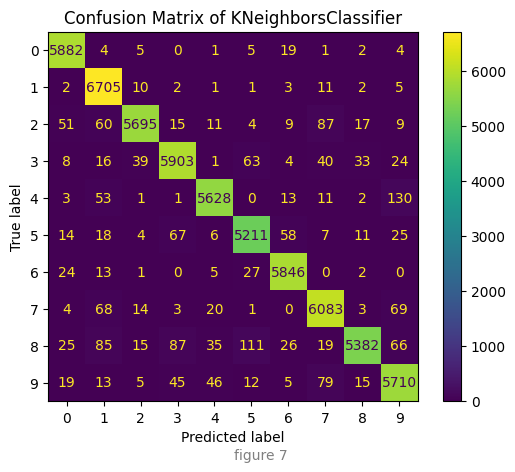

In [32]:
ConfusionMatrixDisplay.from_predictions(y_train, knn_clf_predict)

plt.title("Confusion Matrix of KNeighborsClassifier")
plt.text(0.5, -0.01, 'figure 7', color="gray", ha="center", fontsize="10", transform=plt.gcf().transFigure)
plt.show()

As the same to the figure 4 the number of instances of digit 5 that was correctly classisified as 5 is fewer compared to other digit in the dataset. Let's see the normalized version of confusion matrix to observe the proportion of correct predictions.

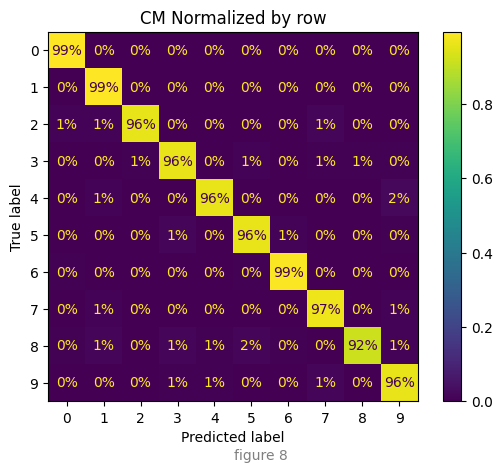

In [33]:
ConfusionMatrixDisplay.from_predictions(y_train, knn_clf_predict, normalize='true', values_format=".0%")
plt.text(0.5, -0.01, 'figure 8', color="gray", ha="center", fontsize="10", transform=plt.gcf().transFigure)
plt.title("CM Normalized by row")
plt.show()


Now I can tell the model's performance was not really bad on class 5 compared to other classes. The lowest proportion of model's correct prediction is 92% at the cell for digit 8. Nonetheless the number is much better than the lowest in figure 5.

Focus on the error.

Text(0.5, -0.02, 'figure 8')

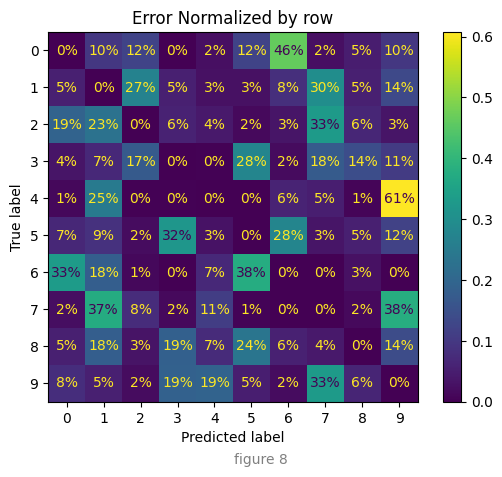

In [34]:
sample_weight = (y_train != knn_clf_predict)

ConfusionMatrixDisplay.from_predictions(y_train, knn_clf_predict,
                                        sample_weight=sample_weight,
                                        normalize='true',
                                        values_format=".0%"
                                        )
plt.title("Error Normalized by row")
plt.text(0.5, -0.02, 'figure 8', ha="center", color="gray", fontsize=10, transform=plt.gcf().transFigure)

### Precision and Recall

In [35]:
knn_report = classification_report(y_train, knn_clf_predict, output_dict=True)
knn_report_df = pd.DataFrame(knn_report).transpose()

In [36]:
knn_report_df

,precision,recall,f1-score,support
0,0.975133,0.993078,0.984023,5923.000000
1,0.953092,0.994512,0.973361,6742.000000
2,0.983762,0.955858,0.969609,5958.000000
3,0.964070,0.962812,0.963441,6131.000000
4,0.978102,0.963369,0.970680,5842.000000
5,0.958786,0.961262,0.960022,5421.000000
6,0.977102,0.987834,0.982438,5918.000000
7,0.959766,0.970950,0.965326,6265.000000
8,0.984092,0.919843,0.950883,5851.000000
9,0.945051,0.959825,0.952381,5949.000000


Now that I have found the better model among three, I am going to fine tune the model to optimize its performance on the data.

## 5-3 CNN

In [5]:
X_train_CNN = X_train.reshape(-1, 28, 28, 1)
X_test_CNN = X_test.reshape(-1, 28, 28, 1)

To use these data for CNN, I have to convert dataset into float32 data type and normalize them by dividing by 255

In [6]:
X_train_CNN = X_train_CNN.astype('float32') / 255.0
X_test_CNN = X_test_CNN.astype('float32') / 255.0
y_train_CNN = y_train.astype('float32')
y_test_CNN = y_test.astype('float32')

In [23]:
tf.random.set_seed(42)
np.random.seed(42)

cnn_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # transform the 4D tensor into 2D tensor where each image is represented as 1D vector
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])
cnn_1.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])



In [24]:
cnn_1.fit(X_train_CNN, y_train_CNN, epochs=10, validation_split=0.2)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7973 - loss: 0.7387 - val_accuracy: 0.9667 - val_loss: 0.1192
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9433 - loss: 0.2043 - val_accuracy: 0.9796 - val_loss: 0.0775
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9607 - loss: 0.1361 - val_accuracy: 0.9818 - val_loss: 0.0773
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9667 - loss: 0.1193 - val_accuracy: 0.9808 - val_loss: 0.0814
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9731 - loss: 0.0914 - val_accuracy: 0.9819 - val_loss: 0.0705
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9746 - loss: 0.0887 - val_accuracy: 0.9841 - val_loss: 0.0663
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9766 - loss: 0.0811 - val_accuracy: 0.9855 - val_loss: 0.0656
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9816 - loss: 0.0638 

Split the trainnig dataset into part, one is training set and another is validation set.

### Confusion Matrix

I splitting the training dataset into training and validation sets to make predictions. I used cross-validation for the first two models, LogisticRegression and KNeighborClassifier, but cross-validation might be computationally intensive for a CNN.

In [9]:
split_index = int(0.8 * len(X_train_CNN))
X_train_CNN, X_valid = X_train_CNN[:split_index], X_train_CNN[split_index:]
y_train_CNN, y_valid = y_train_CNN[:split_index], y_train_CNN[split_index:]

In [21]:
y_predict = model.predict(X_valid)

300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [24]:
y_predict = y_predict.argmax(axis=1)

In [25]:
y_predict.shape

(9600,)

In [28]:
cnn_cm = confusion_matrix(y_valid, y_predict)

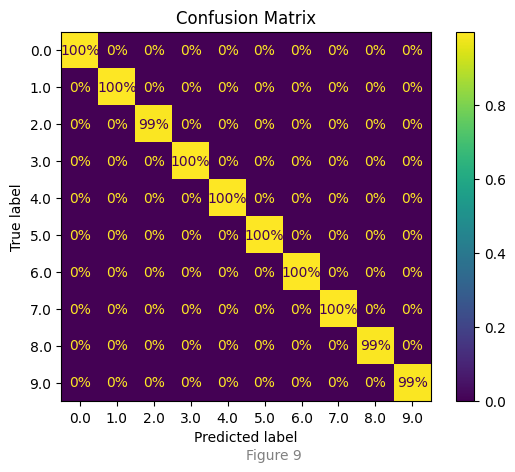

In [31]:
ConfusionMatrixDisplay.from_predictions(y_valid, y_predict, normalize="true", values_format=".0%")
plt.title("Confusion Matrix")
plt.text(0.5, -0.01, 'Figure 9', fontsize=10, ha='center', color="gray", transform=plt.gcf().transFigure)
plt.show()

It appears that the accuracy is relatively higher than other two models.

### Precision and Recall

In [ ]:
precision_score(y_valid, y_predict, average="macro")
recall_score(y_valid, y_predict, average="macro")
f1_score(y_valid, y_predict, average="macro")

In [79]:
cnn_report = classification_report(y_valid, y_predict, output_dict=True)

NameError: name 'y_predict' is not defined

In [36]:
cnn_report_df = pd.DataFrame(cnn_report).transpose()

In [37]:
cnn_report_df

,precision,recall,f1-score,support
0.0,0.998968,0.998968,0.998968,969.000000
1.0,0.998193,0.999096,0.998644,1106.000000
2.0,0.998970,0.994872,0.996917,975.000000
3.0,0.994753,0.997895,0.996322,950.000000
4.0,1.000000,0.998894,0.999447,904.000000
5.0,0.994279,0.997704,0.995989,871.000000
6.0,0.998929,0.997861,0.998395,935.000000
7.0,0.991089,0.999002,0.995030,1002.000000
8.0,0.997886,0.994731,0.996306,949.000000
9.0,0.998928,0.992545,0.995726,939.000000


## Result Comparison

Let's compare the precision, recall and f1 score of each three model I have build so far using a spider chart.

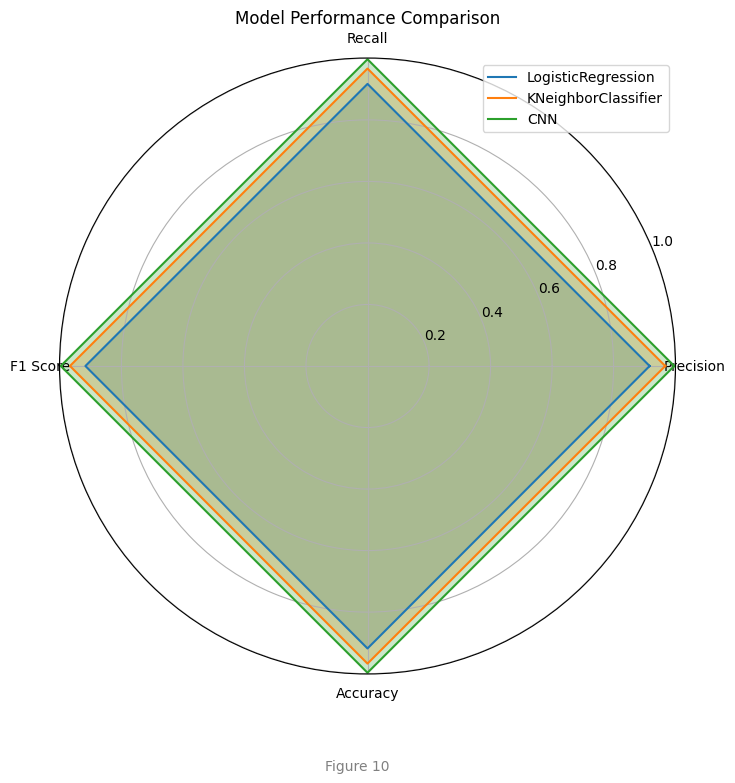

In [82]:
from math import pi

labels = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
num_vars = len(labels)

model_1 = [0.917100, 0.917004, 0.917004, 0.918133]
model_2 = [0.967896, 0.966934, 0.967216, 0.967417]
model_3 = [0.997200, 0.997157, 0.997174, 0.997188]

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for model_scores, model_name in zip([model_1, model_2, model_3], ['LogisticRegression', 'KNeighborClassifier', 'CNN']):
    model_scores += model_scores[:1]
    ax.plot(angles, model_scores, label=model_name)
    ax.fill(angles, model_scores, alpha=0.25)

plt.xticks(angles[:-1], labels)
plt.title("Model Performance Comparison")
plt.text(0.5, -0.01, 'Figure 10', fontsize=10, ha='center', color="gray", transform=plt.gcf().transFigure)
plt.legend(loc='upper right')
plt.show()

It is evident that the CNN model performed the best across all four metrics-precision, recall, F1 score, and accuracy-compared to the other two models. The next task is to fine-tune the CNN model to further optimize its performance on the data.

# 6. Fine Tuning

## The learninig rate shedule

In [48]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate=0.01,
      decay_steps=20_000,
      decay_rate=0.1,
      staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [49]:
cnn_2.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [54]:
print("X_train_CNN shape:", X_train_CNN.shape, "dtype:", X_train_CNN.dtype)
print("y_train_CNN shape:", y_train_CNN.shape, "dtype:", y_train_CNN.dtype)
print("X_valid shape:", X_valid.shape, "dtype:", X_valid.dtype)
print("y_valid shape:", y_valid.shape, "dtype:", y_valid.dtype)

X_train_CNN shape: (30720, 28, 28, 1) dtype: float32
y_train_CNN shape: (30720,) dtype: int32
X_valid shape: (7680, 28, 28, 1) dtype: float32
y_valid shape: (7680,) dtype: int32


In [45]:
y_train_CNN = y_train_CNN.astype('int32')
y_valid = y_valid.astype('int32')

In [56]:
cnn_2.fit(X_train_CNN, y_train_CNN, epochs=10, validation_data=(X_valid, y_valid) )

Epoch 1/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 130s 135ms/step - accuracy: 0.9304 - loss: 0.2311 - val_accuracy: 0.8169 - val_loss: 0.7304
Epoch 2/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 126s 131ms/step - accuracy: 0.9299 - loss: 0.2314 - val_accuracy: 0.9439 - val_loss: 0.1767
Epoch 3/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 138s 127ms/step - accuracy: 0.9324 - loss: 0.2305 - val_accuracy: 0.7988 - val_loss: 0.8446
Epoch 4/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 116s 121ms/step - accuracy: 0.9312 - loss: 0.2265 - val_accuracy: 0.7132 - val_loss: 1.5051
Epoch 5/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 119s 124ms/step - accuracy: 0.9350 - loss: 0.2199 - val_accuracy: 0.9025 - val_loss: 0.3284
Epoch 6/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 148s 130ms/step - accuracy: 0.9361 - loss: 0.2162 - val_accuracy: 0.9434 - val_loss: 0.1802
Epoch 7/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 143s 132ms/step - accuracy: 0.9355 - loss: 0.2213 - val_accuracy: 0.9509 - val_loss: 0.1609
Epoch 8/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 135s 125ms/step - accuracy: 0.9366 -

In [70]:
y_predict_CNN = model.predict(X_valid)

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step


In [71]:
y_predict_CNN.astype(int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [74]:
y_valid.shape

(7680,)

In [73]:
y_predict_CNN.shape

(7680, 10)

In [75]:
y_predict_CNN = np.argmax(y_predict_CNN, axis=1)

In [76]:
cnn_cm_1 = confusion_matrix(y_valid, y_predict_CNN)

In [77]:
cnn_cm_1

array([[690,   0,   0,   0,   2,  14,   4,  10,   1,   0],
       [  0, 846,   5,   1,   1,   0,   1,   1,   0,   1],
       [  1,  22, 697,   3,  15,   4,   2,  24,   3,   1],
       [  0,  19,  10, 698,   1,  30,   3,  20,   5,   7],
       [  1,   7,   3,   1, 727,   1,   7,   6,   0,   6],
       [  3,  12,   1,   5,   2, 649,   7,   4,   1,   4],
       [  3,  19,   2,   0,  11,  14, 715,   2,   0,   0],
       [  1,  13,   1,   1,   3,   0,   0, 758,   0,   4],
       [  2,  73,  12,  14,  15,  58,   4,  18, 545,  16],
       [  2,   9,   1,   2,  48,   4,   0,  80,   2, 639]])

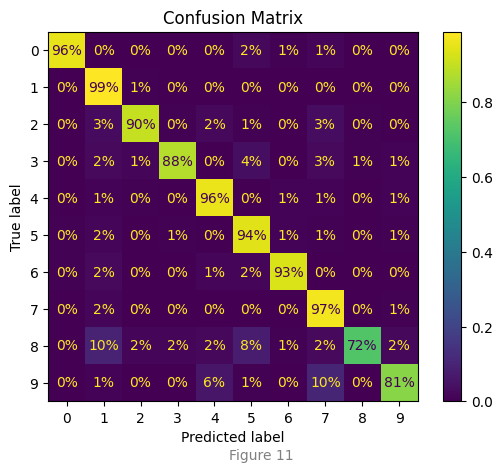

In [78]:
ConfusionMatrixDisplay.from_predictions(y_valid, y_predict_CNN, normalize="true", values_format=".0%")
plt.title("Confusion Matrix")
plt.text(0.5, -0.01, 'Figure 11', fontsize=10, ha='center', color="gray", transform=plt.gcf().transFigure)
plt.show()

In [80]:
cnn_report_2 = classification_report(y_valid, y_predict_CNN, output_dict=True)

In [81]:
cnn_report_2_df = pd.DataFrame(cnn_report_2).transpose()
cnn_report_2_df

,precision,recall,f1-score,support
0,0.981508,0.957004,0.969101,721.000000
1,0.829412,0.988318,0.901919,856.000000
2,0.952186,0.902850,0.926862,772.000000
3,0.962759,0.880202,0.919631,793.000000
4,0.881212,0.957839,0.917929,759.000000
5,0.838501,0.943314,0.887825,688.000000
6,0.962315,0.933420,0.947647,766.000000
7,0.821235,0.970551,0.889671,781.000000
8,0.978456,0.719947,0.829528,757.000000
9,0.942478,0.811944,0.872355,787.000000


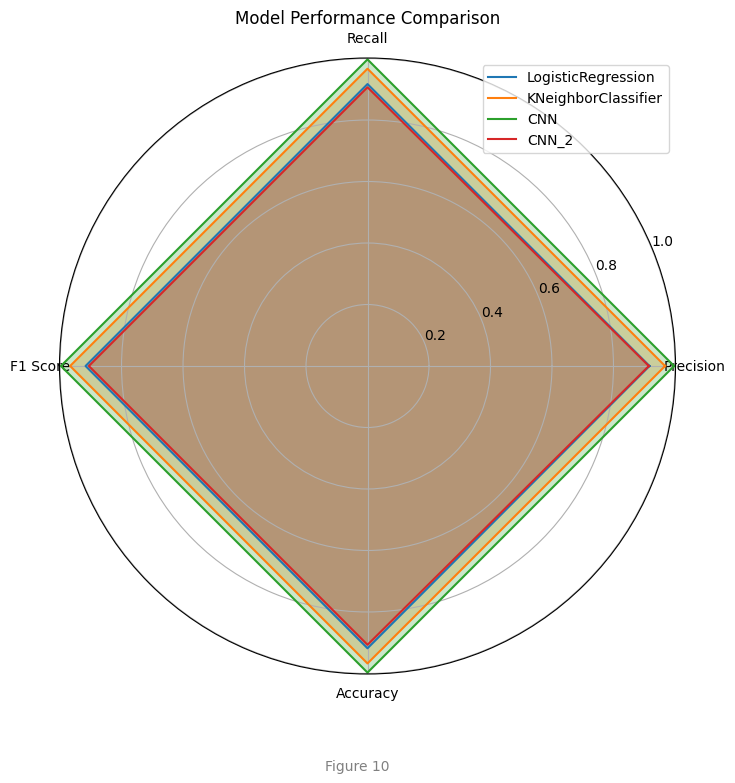

In [83]:
from math import pi

labels = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
num_vars = len(labels)

model_1 = [0.917100, 0.917004, 0.917004, 0.918133]
model_2 = [0.967896, 0.966934, 0.967216, 0.967417]
model_3 = [0.997200, 0.997157, 0.997174, 0.997188]
model_4 = [0.915006, 0.906539, 0.906247, 0.906771]

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for model_scores, model_name in zip([model_1, model_2, model_3, model_4], ['LogisticRegression', 'KNeighborClassifier', 'CNN', 'CNN_2']):
    model_scores += model_scores[:1]
    ax.plot(angles, model_scores, label=model_name)
    ax.fill(angles, model_scores, alpha=0.25)

plt.xticks(angles[:-1], labels)
plt.title("Model Performance Comparison")
plt.text(0.5, -0.01, 'Figure 10', fontsize=10, ha='center', color="gray", transform=plt.gcf().transFigure)
plt.legend(loc='upper right')
plt.show()

After compiling the model with SGD optimizer with learning scheduilng, the model's performance become much worse.

In [8]:
X_train_CNN.shape
y_train_CNN.shape

(60000,)

###Drop the normalization layer from the cnn_1 model.

In [10]:
cnn_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # transform the 4D tensor into 2D tensor where each image is represented as 1D vector
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

cnn_3.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])

cnn_3.fit(X_train_CNN, y_train_CNN, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8787 - loss: 0.3781 - val_accuracy: 0.9827 - val_loss: 0.0557
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9745 - loss: 0.0859 - val_accuracy: 0.9854 - val_loss: 0.0461
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9814 - loss: 0.0637 - val_accuracy: 0.9895 - val_loss: 0.0378
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9848 - loss: 0.0483 - val_accuracy: 0.9900 - val_loss: 0.0375
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9883 - loss: 0.0380 - val_accuracy: 0.9883 - val_loss: 0.0427
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9885 - loss: 0.0340 - val_accuracy: 0.9898 - val_loss: 0.0441
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9908 - loss: 0.0285 - val_accuracy: 0.9902 - val_loss: 0.0376
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9917 - loss: 0.0

In [18]:
cnn_3_predict = cnn_3.predict(X_valid)
cnn_3_predict = cnn_3_predict.argmax(axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
cnn_3_predict.shape

(12000,)

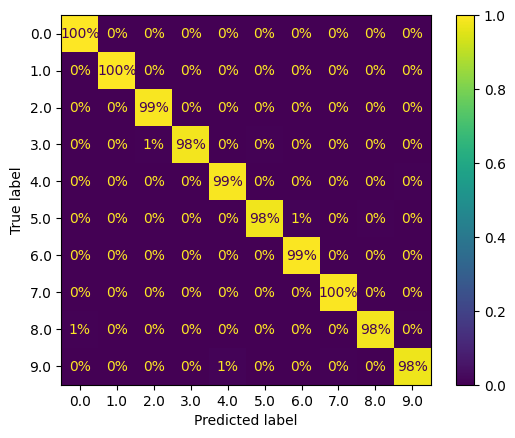

In [20]:
cnn_3_cm = confusion_matrix(y_valid, cnn_3_predict)
ConfusionMatrixDisplay.from_predictions(y_valid, cnn_3_predict, normalize='true', values_format='.0%' )

In [22]:
cnn_3_report = classification_report(y_valid, cnn_3_predict, output_dict=True)
cnn_3_report_df = pd.DataFrame(cnn_3_report).transpose()
cnn_3_report_df

,precision,recall,f1-score,support
0.0,0.984336,1.000000,0.992106,1194.00000
1.0,0.989080,0.996855,0.992952,1272.00000
2.0,0.990787,0.989130,0.989958,1196.00000
3.0,0.993496,0.983897,0.988673,1242.00000
4.0,0.983264,0.989890,0.986566,1187.00000
5.0,0.991674,0.977211,0.984389,1097.00000
6.0,0.987256,0.993162,0.990200,1170.00000
7.0,0.990031,0.995374,0.992695,1297.00000
8.0,0.992418,0.983306,0.987841,1198.00000
9.0,0.985048,0.976460,0.980736,1147.00000


The accuracy and other matrics are kind of good, yet the first CNN model is better. So I am going to evaluate that model as the final model on the test set.

In [26]:
final_predictions = cnn_1.predict(X_test_CNN)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [32]:
final_predictions = final_predictions.argmax(axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [35]:
y_test = y_test.astype("int32")
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int32)

In [36]:
final_report = classification_report(y_test, final_predictions, output_dict=True)
final_report_df = pd.DataFrame(final_report).transpose()

In [37]:
final_report_df

,precision,recall,f1-score,support
0,0.983871,0.995918,0.989858,980.0000
1,0.985166,0.994714,0.989917,1135.0000
2,0.981766,0.991279,0.986500,1032.0000
3,0.994024,0.988119,0.991063,1010.0000
4,0.983806,0.989817,0.986802,982.0000
5,0.983315,0.991031,0.987158,892.0000
6,0.989540,0.987474,0.988506,958.0000
7,0.989184,0.978599,0.983863,1028.0000
8,0.991744,0.986653,0.989192,974.0000
9,0.991895,0.970268,0.980962,1009.0000


### Summary
The accuracy score for the CNN model reached 98.74%, which appears to be quite strong. In this notebook, I used three classification algorithms, and, as I expected, the CNN performed best on this image classification task. However there is still possibility that the other two models, Logistic Regression and KNeighborsClassifier, could outperform the CNN with more effective hyperparamter tuning and data preprocessing.